<a href="https://colab.research.google.com/github/nhd1612/-LJS/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A4%91%EA%B0%84_%EB%B3%B4%EA%B3%A0_(%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 데이터 프로젝트 중간 보고# 
202104282 이수민 202184042 이재성

In [ ]:
# 한글 폰트 다운로드 ( 런타임 재시작 후 다시 런)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#PM-10은 미세먼지이다.
#PM-2.5은 초미세먼지이다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

md = pd.read_csv('micro_dust.csv',encoding= 'cp949')  # 서울 지하철역사 공기질 
md = md.drop(columns=['연번'])      #열 지우기 
tp = pd.read_csv('train_people.csv',encoding= 'cp949') # 서울 환승이용인원   
tp = tp.drop(columns=['연번'])      #열 지우기 
merge_data = pd.merge(md,tp,on = '역명', how='inner')  # column'역명'으로 교집합 merge_data 제작 
PM = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자', '평일(일평균)',
                                '토요일', '일요일','역번호']) # 미세먼지만 표시한 종합 데이터
T = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자', 'PM-10',
                               'PM-2.5', '역번호']) # 환승이용인원만 표시한 종합 데이터
data = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자','역번호']) # 미세먼지와 환승역 인원 데이터  
merge_data

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
0,1호선,150,서울역,39.9,27.3,566,11.5,0.7,2023-04-25,93461,77181,60328
1,4호선,426,서울역,25.1,16.8,491,6.6,0.7,2023-04-25,93461,77181,60328
2,1호선,151,시청,83.5,34.9,545,12.0,0.7,2023-04-25,34177,28478,19627
3,2호선,201,시청,63.2,37.4,522,7.2,0.5,2023-04-25,34177,28478,19627
4,1호선,153,종로3가,96.0,44.6,507,10.3,0.8,2023-04-25,108811,95362,64621
...,...,...,...,...,...,...,...,...,...,...,...,...
91,7호선,2752,온수,30.9,17.4,516,15.6,0.3,2023-04-25,46386,33332,24823
92,8호선,2816,석촌,47.8,22.7,542,16.0,0.4,2023-04-25,29676,19988,15215
93,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
94,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934


In [ ]:
print(md) # 서울 지하철역사 공기질

      호선  역번호      역명  PM-10  PM-2.5  CO2  HCHO   CO     데이터기준일자
0    1호선  150     서울역   39.9    27.3  566  11.5  0.7  2023-04-25
1    1호선  151      시청   83.5    34.9  545  12.0  0.7  2023-04-25
2    1호선  152      종각  110.0    58.0  500  12.2  0.7  2023-04-25
3    1호선  153    종로3가   96.0    44.6  507  10.3  0.8  2023-04-25
4    1호선  154    종로5가   73.2    37.6  525   8.1  0.7  2023-04-25
..   ...  ...     ...    ...     ...  ...   ...  ...         ...
258  9호선  934    송파나루   44.3    25.9  449   4.4  0.8  2023-04-25
259  9호선  935    한성백제   40.1    35.5  428   7.4  1.2  2023-04-25
260  9호선  936   올림픽공원   49.1    27.8  465   6.1  0.5  2023-04-25
261  9호선  937    둔촌오륜   36.7    25.8  419   5.7  0.5  2023-04-25
262  9호선  938  중앙보훈병원   39.2    23.2  510   5.8  0.7  2023-04-25

[263 rows x 9 columns]


In [ ]:
print(tp) # 서울 환승이용인원 

         역명  평일(일평균)    토요일    일요일
0      가락시장    27085  18096  13918
1   가산디지털단지    71425  42899  33737
2        강남    63594  42063  30810
3      강남구청    50526  33079  21566
4        강동     4605   3219   2313
..      ...      ...    ...    ...
65      충정로    11961   6183   4337
66     태릉입구    37160  27116  19871
67       합정    76959  59612  42655
68     홍대입구    51802  49401  37311
69    효창공원앞     5125   4132   3243

[70 rows x 4 columns]


In [ ]:
print(merge_data) # column'역명'으로 교집합 merge_data 

     호선   역번호      역명  PM-10  PM-2.5  CO2  HCHO   CO     데이터기준일자  평일(일평균)  \
0   1호선   158     청량리   56.8    33.1  452   6.0  0.8  2023-04-25    17699   
1   2호선   220      선릉   46.8    26.8  513   8.0  0.9  2023-04-25    78335   
2   3호선   332      양재   37.3    19.7  460   9.1  0.8  2023-04-25    47294   
3   3호선   334      도곡   36.5    21.1  460   8.7  0.5  2023-04-25    21547   
4   4호선   418  성신여대입구   58.4    31.7  516  12.2  0.7  2023-04-25    19386   
5   4호선   430      이촌   74.2    32.8  473   8.3  1.0  2023-04-25    19372   
6   5호선  2527     여의도   49.3    21.8  826   8.6  0.5  2023-04-25    45330   
7   5호선  2549      강동   29.0    15.9  484   8.0  0.5  2023-04-25     4605   
8   6호선  2639      보문   44.3    25.3  510  10.5  0.3  2023-04-25    13249   
9   6호선  2645      석계   30.4    15.9  545   4.8  0.5  2023-04-25    18884   
10  7호선  2722      상봉   34.6    24.2  576  11.1  0.6  2023-04-25    35930   
11  7호선  2732    강남구청   26.5    18.4  622  10.3  0.4  2023-04-25    50526   

In [ ]:
print(PM) # 미세먼지만 표시한 종합 데이터

        역명  PM-10  PM-2.5
0      청량리   56.8    33.1
1       선릉   46.8    26.8
2       양재   37.3    19.7
3       도곡   36.5    21.1
4   성신여대입구   58.4    31.7
5       이촌   74.2    32.8
6      여의도   49.3    21.8
7       강동   29.0    15.9
8       보문   44.3    25.3
9       석계   30.4    15.9
10      상봉   34.6    24.2
11    강남구청   26.5    18.4
12      복정   24.4    11.7
13      모란   24.2    12.0
14      석촌   51.7    33.0
15   올림픽공원   49.1    27.8


In [ ]:
print(data) # 미세먼지와 환승역 인원 데이터  

        역명  PM-10  PM-2.5  평일(일평균)    토요일    일요일
0      청량리   56.8    33.1    17699  19512  16237
1       선릉   46.8    26.8    78335  48783  31021
2       양재   37.3    19.7    47294  36128  25526
3       도곡   36.5    21.1    21547  14576   9510
4   성신여대입구   58.4    31.7    19386  15636  12521
5       이촌   74.2    32.8    19372  19111  14386
6      여의도   49.3    21.8    45330  30964  21805
7       강동   29.0    15.9     4605   3219   2313
8       보문   44.3    25.3    13249   9937   7392
9       석계   30.4    15.9    18884  14360  11276
10      상봉   34.6    24.2    35930  30447  24310
11    강남구청   26.5    18.4    50526  33079  21566
12      복정   24.4    11.7    57748  37995  27934
13      모란   24.2    12.0    15667  11789   8528
14      석촌   51.7    33.0    29676  19988  15215
15   올림픽공원   49.1    27.8    15690  11549   9082


In [ ]:
print(T) # 환승이용인원만 표시한 종합 데이터

        역명  평일(일평균)    토요일    일요일
0      청량리    17699  19512  16237
1       선릉    78335  48783  31021
2       양재    47294  36128  25526
3       도곡    21547  14576   9510
4   성신여대입구    19386  15636  12521
5       이촌    19372  19111  14386
6      여의도    45330  30964  21805
7       강동     4605   3219   2313
8       보문    13249   9937   7392
9       석계    18884  14360  11276
10      상봉    35930  30447  24310
11    강남구청    50526  33079  21566
12      복정    57748  37995  27934
13      모란    15667  11789   8528
14      석촌    29676  19988  15215
15   올림픽공원    15690  11549   9082


### PM-10(미세먼지)
3호선 환승 을지로 3가\
1호선 환승 동대문\
1호선 환승 종로3가 \
순으로 미세먼지가 많이 발생하는 것으로 나타낸다. \
적은순서는 \
3호선 가락시장 \
4호선 삼각지\
8호선 모란\
순으로 진행된다.

In [ ]:
merge_data.sort_values('PM-10',ascending=False) #PM-10 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
5,4호선,430,이촌,74.2,32.8,473,8.3,1.0,2023-04-25,19372,19111,14386
4,4호선,418,성신여대입구,58.4,31.7,516,12.2,0.7,2023-04-25,19386,15636,12521
0,1호선,158,청량리,56.8,33.1,452,6.0,0.8,2023-04-25,17699,19512,16237
14,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
6,5호선,2527,여의도,49.3,21.8,826,8.6,0.5,2023-04-25,45330,30964,21805
15,9호선,936,올림픽공원,49.1,27.8,465,6.1,0.5,2023-04-25,15690,11549,9082
1,2호선,220,선릉,46.8,26.8,513,8.0,0.9,2023-04-25,78335,48783,31021
8,6호선,2639,보문,44.3,25.3,510,10.5,0.3,2023-04-25,13249,9937,7392
2,3호선,332,양재,37.3,19.7,460,9.1,0.8,2023-04-25,47294,36128,25526
3,3호선,334,도곡,36.5,21.1,460,8.7,0.5,2023-04-25,21547,14576,9510


###PM-2.5(초미세먼지)###

3호선 환승 을지로 3가\
1호선 환승 동대문\
1호선 환승 종로3가\
순으로 초미세먼지가 많이 발생하는 것으로 나타낸다.\
적은순서는\
3호선 가락시장\
4호선 삼각지\
8호선 모란\
순으로 진행된다.

In [ ]:
merge_data.sort_values('PM-2.5',ascending=False) #PM-2.5 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
7,1호선,155,동대문,96.6,54.0,585,7.9,1.0,2023-04-25,34701,30571,21400
4,1호선,153,종로3가,96.0,44.6,507,10.3,0.8,2023-04-25,108811,95362,64621
41,2호선,243,충정로,60.6,39.1,439,8.8,0.7,2023-04-25,11961,6183,4337
47,3호선,321,충무로,62.9,38.5,479,6.8,0.6,2023-04-25,101438,77858,51216
3,2호선,201,시청,63.2,37.4,522,7.2,0.5,2023-04-25,34177,28478,19627
...,...,...,...,...,...,...,...,...,...,...,...,...
37,5호선,2524,영등포구청,26.4,13.0,533,4.1,0.5,2023-04-25,64114,44386,29907
57,8호선,2818,가락시장,27.1,12.5,712,12.3,0.5,2023-04-25,27085,18096,13918
68,5호선,2530,공덕,25.0,12.3,444,6.2,0.4,2023-04-25,66132,44274,32655
95,8호선,2827,모란,24.2,12.0,398,11.1,0.5,2023-04-25,15667,11789,8528


###평일(일평균)/토요일/일요일###


2호선 환승 신도림\
7호선 환승 고속터미널\
3호선 환승 고속터미널\
순으로 많이 왕래한다는 것으로 알 수 있다.\
적은순서는\
2호선 충정로\
6호선 효창공원앞\
5호선 강동\
순으로 진행된다.

In [ ]:
merge_data.sort_values('평일(일평균)',ascending=False) #평일(일평균) 환승인원 내림차수 

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
1,2호선,220,선릉,46.8,26.8,513,8.0,0.9,2023-04-25,78335,48783,31021
12,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934
11,7호선,2732,강남구청,26.5,18.4,622,10.3,0.4,2023-04-25,50526,33079,21566
2,3호선,332,양재,37.3,19.7,460,9.1,0.8,2023-04-25,47294,36128,25526
6,5호선,2527,여의도,49.3,21.8,826,8.6,0.5,2023-04-25,45330,30964,21805
10,7호선,2722,상봉,34.6,24.2,576,11.1,0.6,2023-04-25,35930,30447,24310
14,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
3,3호선,334,도곡,36.5,21.1,460,8.7,0.5,2023-04-25,21547,14576,9510
4,4호선,418,성신여대입구,58.4,31.7,516,12.2,0.7,2023-04-25,19386,15636,12521
5,4호선,430,이촌,74.2,32.8,473,8.3,1.0,2023-04-25,19372,19111,14386


In [ ]:
merge_data.sort_values('토요일',ascending=False) #토요일 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
1,2호선,220,선릉,46.8,26.8,513,8.0,0.9,2023-04-25,78335,48783,31021
12,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934
2,3호선,332,양재,37.3,19.7,460,9.1,0.8,2023-04-25,47294,36128,25526
11,7호선,2732,강남구청,26.5,18.4,622,10.3,0.4,2023-04-25,50526,33079,21566
6,5호선,2527,여의도,49.3,21.8,826,8.6,0.5,2023-04-25,45330,30964,21805
10,7호선,2722,상봉,34.6,24.2,576,11.1,0.6,2023-04-25,35930,30447,24310
14,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
0,1호선,158,청량리,56.8,33.1,452,6.0,0.8,2023-04-25,17699,19512,16237
5,4호선,430,이촌,74.2,32.8,473,8.3,1.0,2023-04-25,19372,19111,14386
4,4호선,418,성신여대입구,58.4,31.7,516,12.2,0.7,2023-04-25,19386,15636,12521


In [ ]:
merge_data.sort_values('일요일',ascending=False) #일요일 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
1,2호선,220,선릉,46.8,26.8,513,8.0,0.9,2023-04-25,78335,48783,31021
12,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934
2,3호선,332,양재,37.3,19.7,460,9.1,0.8,2023-04-25,47294,36128,25526
10,7호선,2722,상봉,34.6,24.2,576,11.1,0.6,2023-04-25,35930,30447,24310
6,5호선,2527,여의도,49.3,21.8,826,8.6,0.5,2023-04-25,45330,30964,21805
11,7호선,2732,강남구청,26.5,18.4,622,10.3,0.4,2023-04-25,50526,33079,21566
0,1호선,158,청량리,56.8,33.1,452,6.0,0.8,2023-04-25,17699,19512,16237
14,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
5,4호선,430,이촌,74.2,32.8,473,8.3,1.0,2023-04-25,19372,19111,14386
4,4호선,418,성신여대입구,58.4,31.7,516,12.2,0.7,2023-04-25,19386,15636,12521


In [ ]:
merge_data['PM-10'].min() # PM-10(미세먼지) 최솟값

24.2

In [ ]:
merge_data['PM-10'].max() # PM-10(미세먼지) 최댓값

74.2

In [ ]:
merge_data['PM-2.5'].max()# PM-2.5(초미세먼지) 최댓값

33.1

In [ ]:
merge_data['PM-2.5'].min() # PM-2.5(초미세먼지) 최솟값

11.7

#시각화 그래프 #
1. 공기질 그래프
2. 환승역 이용 인원 그래프

###1. 공기질 그래프###

Text(0.5, 1.0, 'ultrafine dust of transfer station')

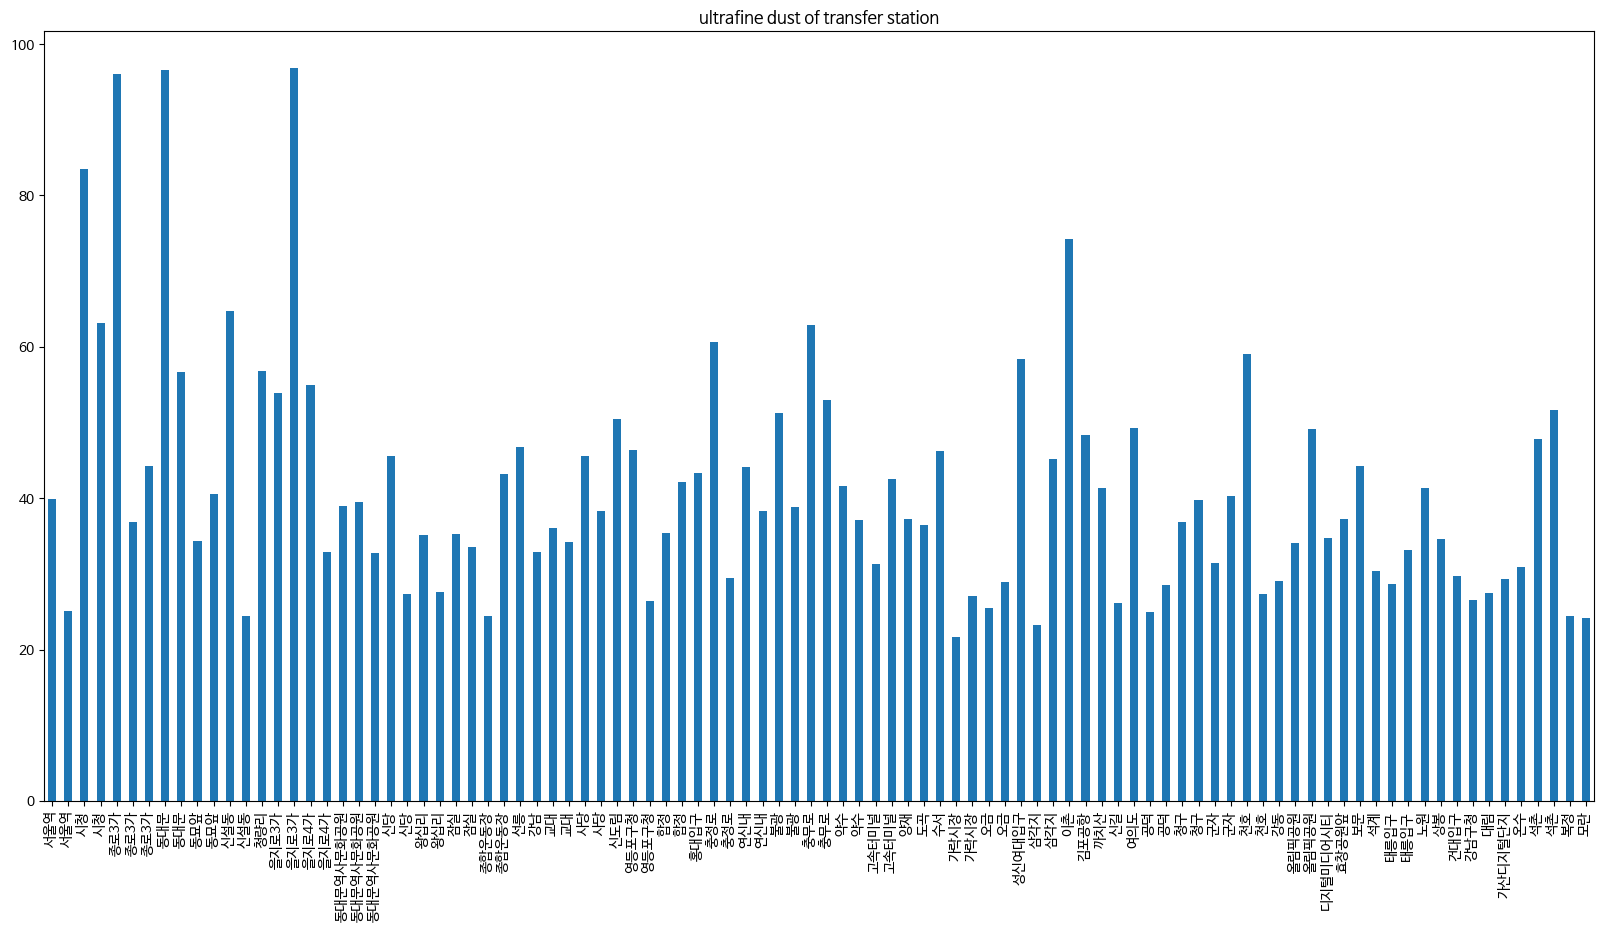

In [ ]:
data = merge_data['PM-10'].plot(kind = 'bar')         #bar 형식의 미세먼지 시각화 
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

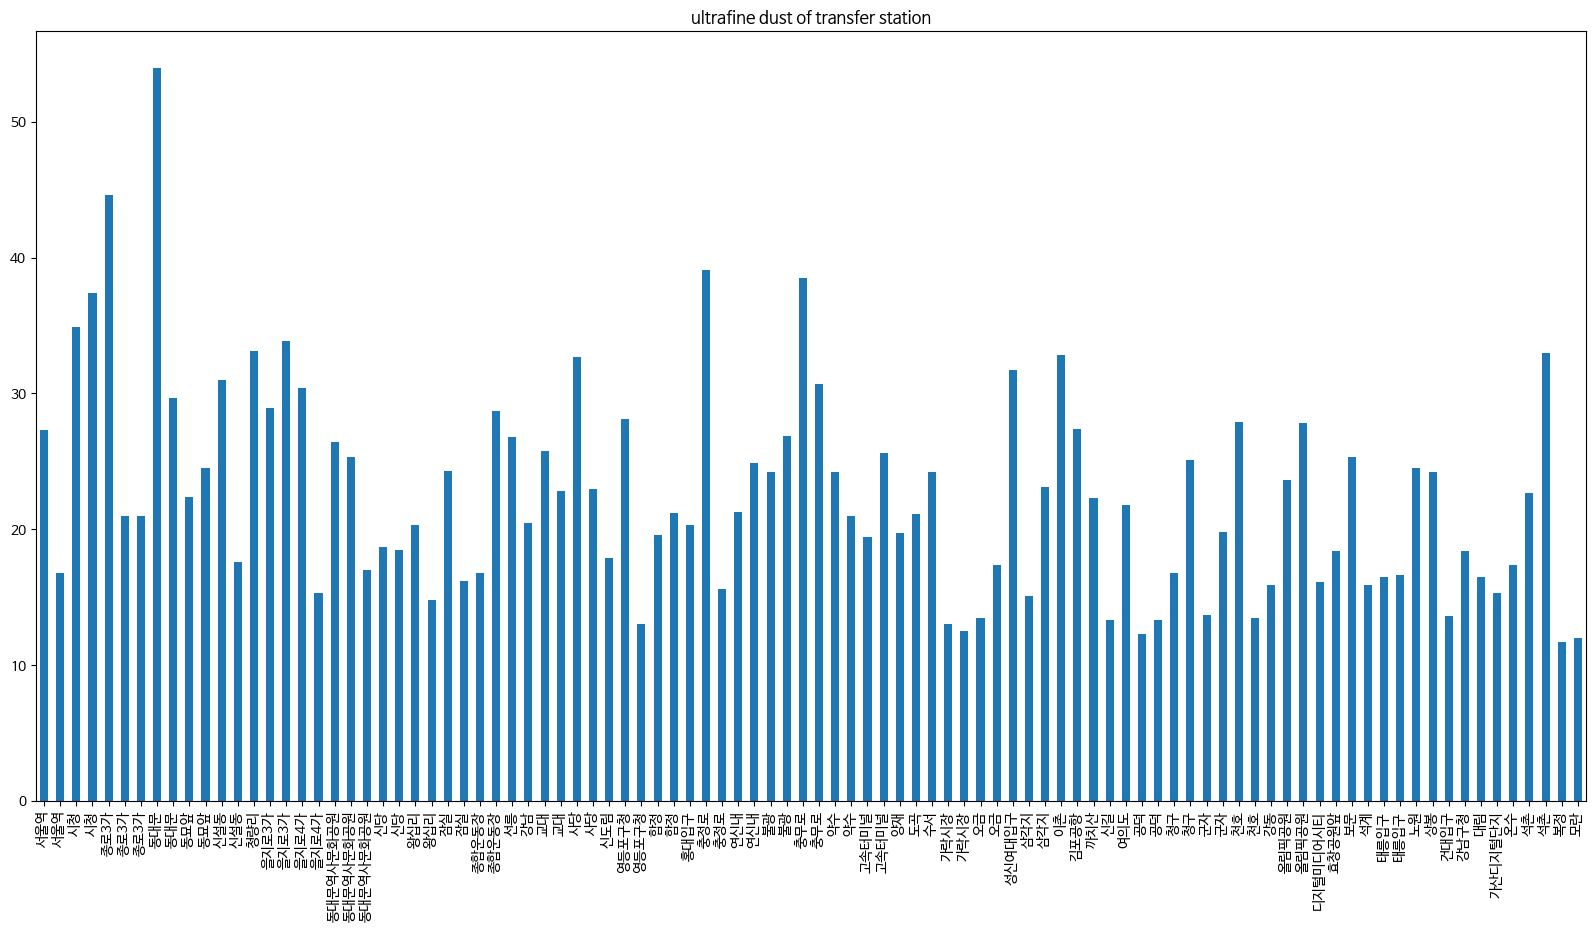

In [ ]:
merge_data['PM-2.5'].plot(kind = 'bar') # bar형식의 초미세먼지 시각화
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수', 
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목
plt.show()

###2.서울 환승역 이용 인원###

Text(0.5, 1.0, 'ultrafine dust of transfer station')

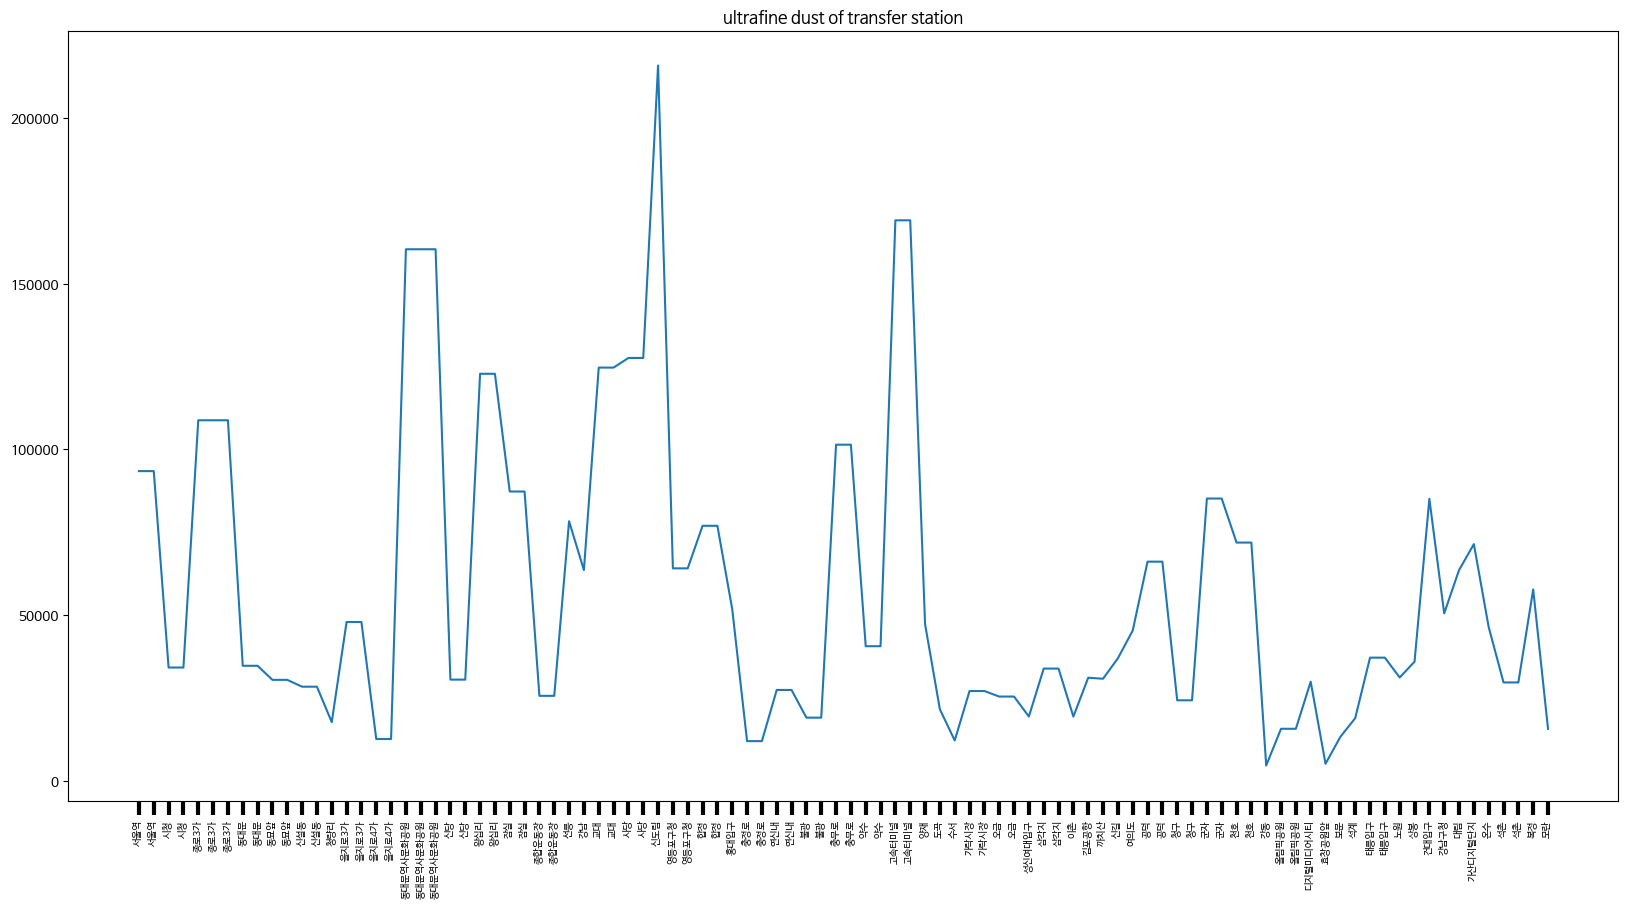

In [ ]:
#환승역 인원 그래프 그리기
# 평일( 일평균)
data = merge_data['평일(일평균)'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

Text(0.5, 1.0, 'ultrafine dust of transfer station')

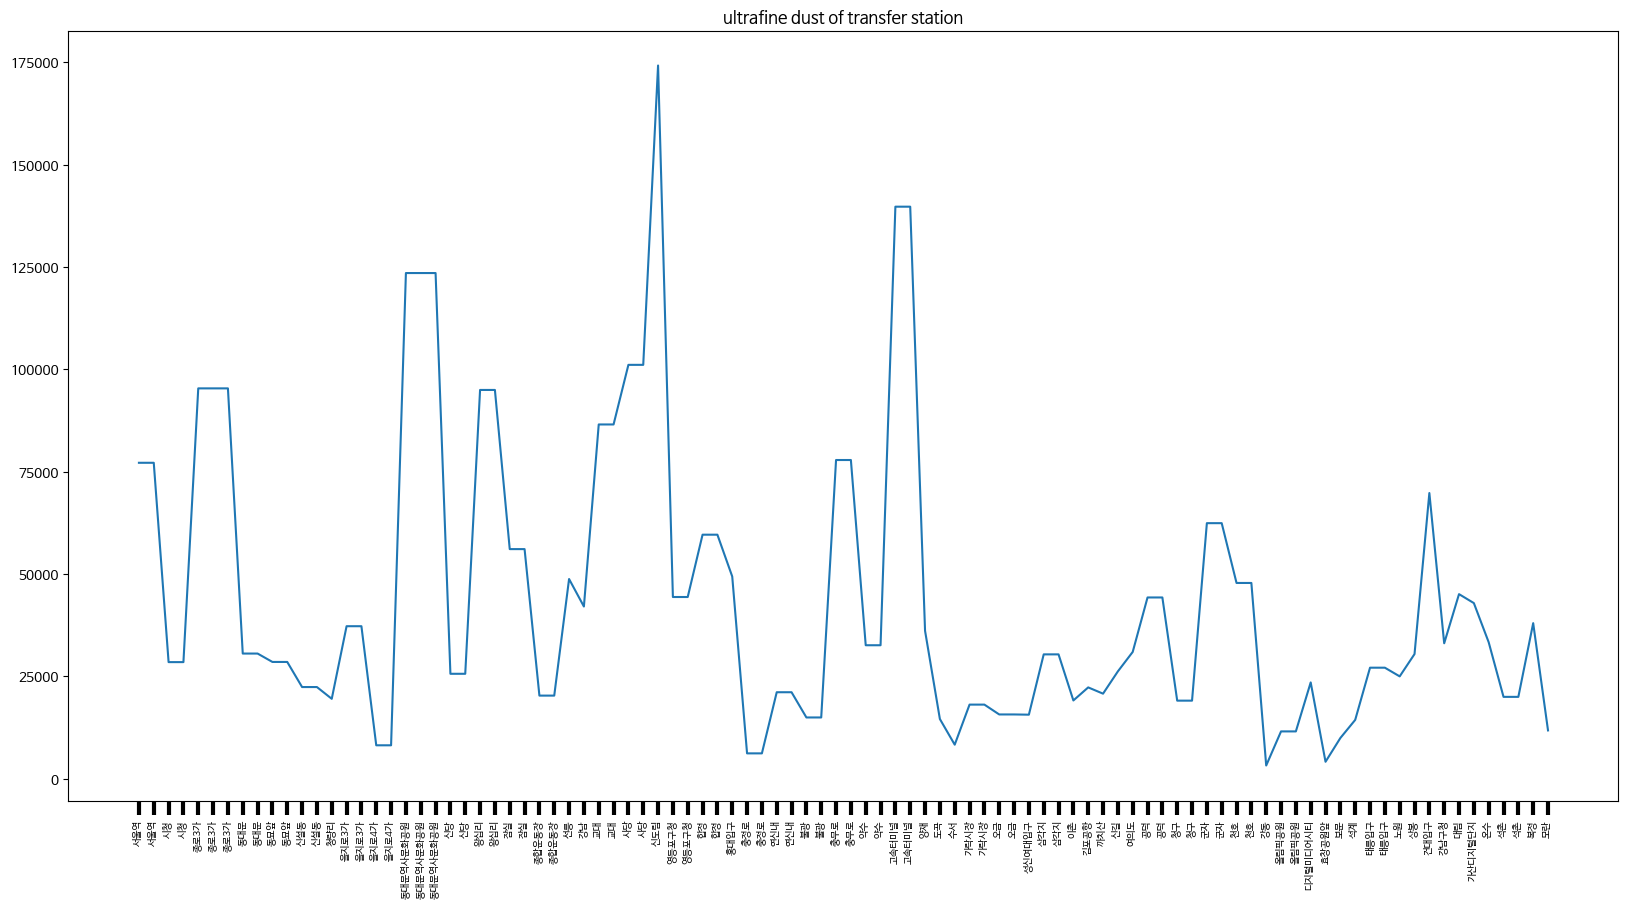

In [ ]:
#환승역 인원 그래프 그리기
# 주말(토요일)
data = merge_data['토요일'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

Text(0.5, 1.0, 'ultrafine dust of transfer station')

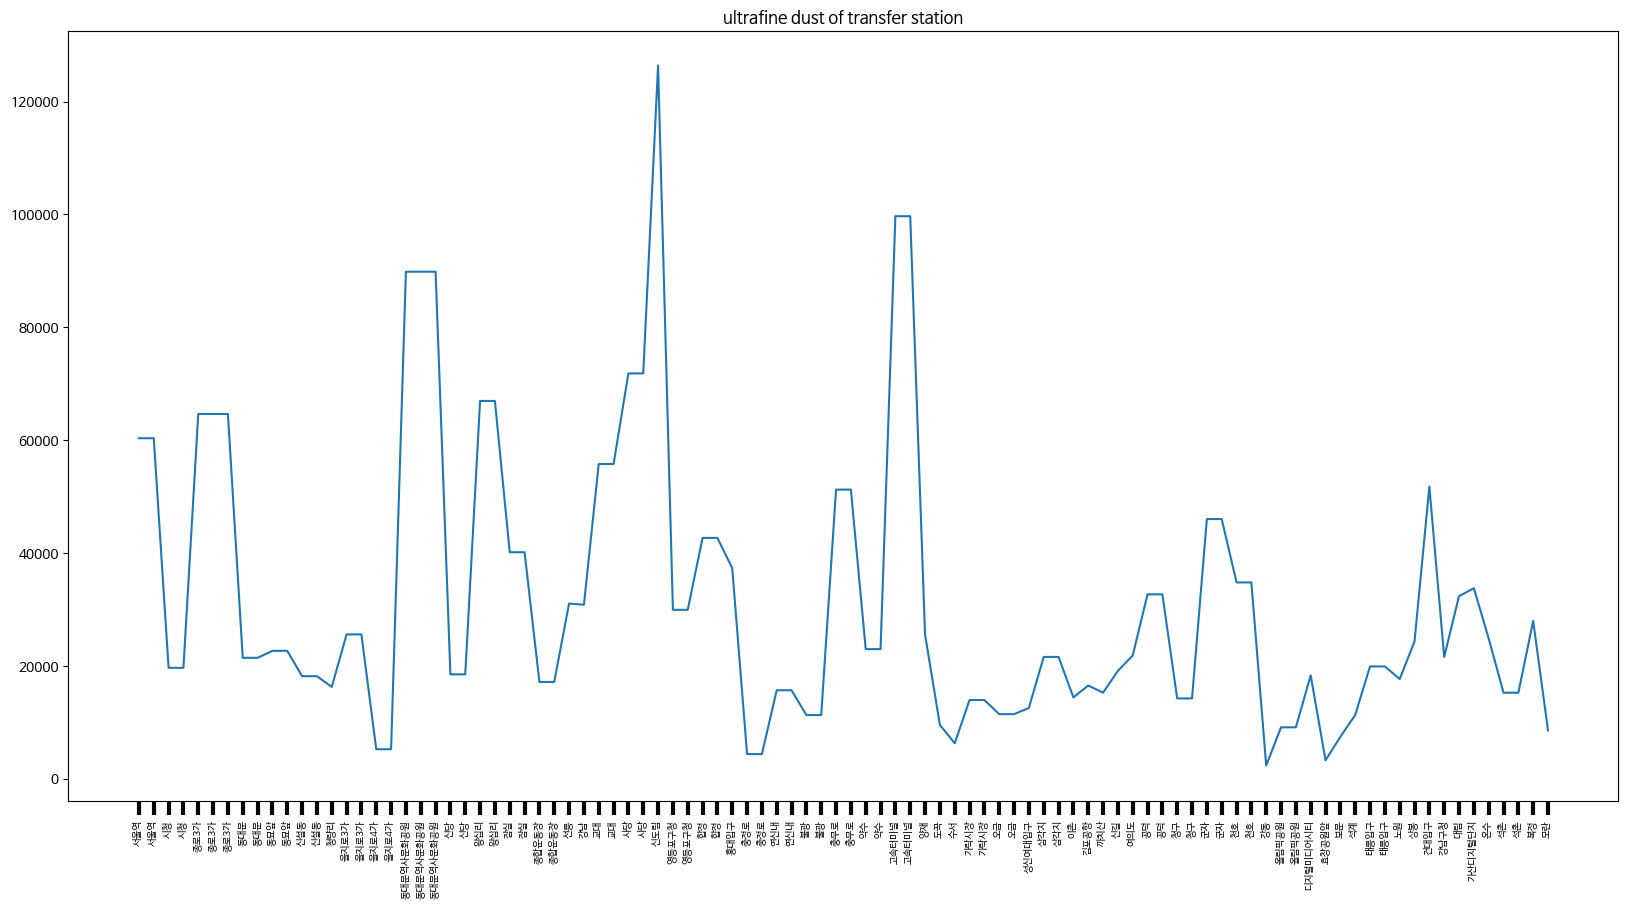

In [ ]:
#환승역 인원 그래프 그리기
# 주말(일요일)
data = merge_data['일요일'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

#모든 요일의 데이터 시각화 #

Text(0.5, 1.0, 'ultrafine dust of transfer station')

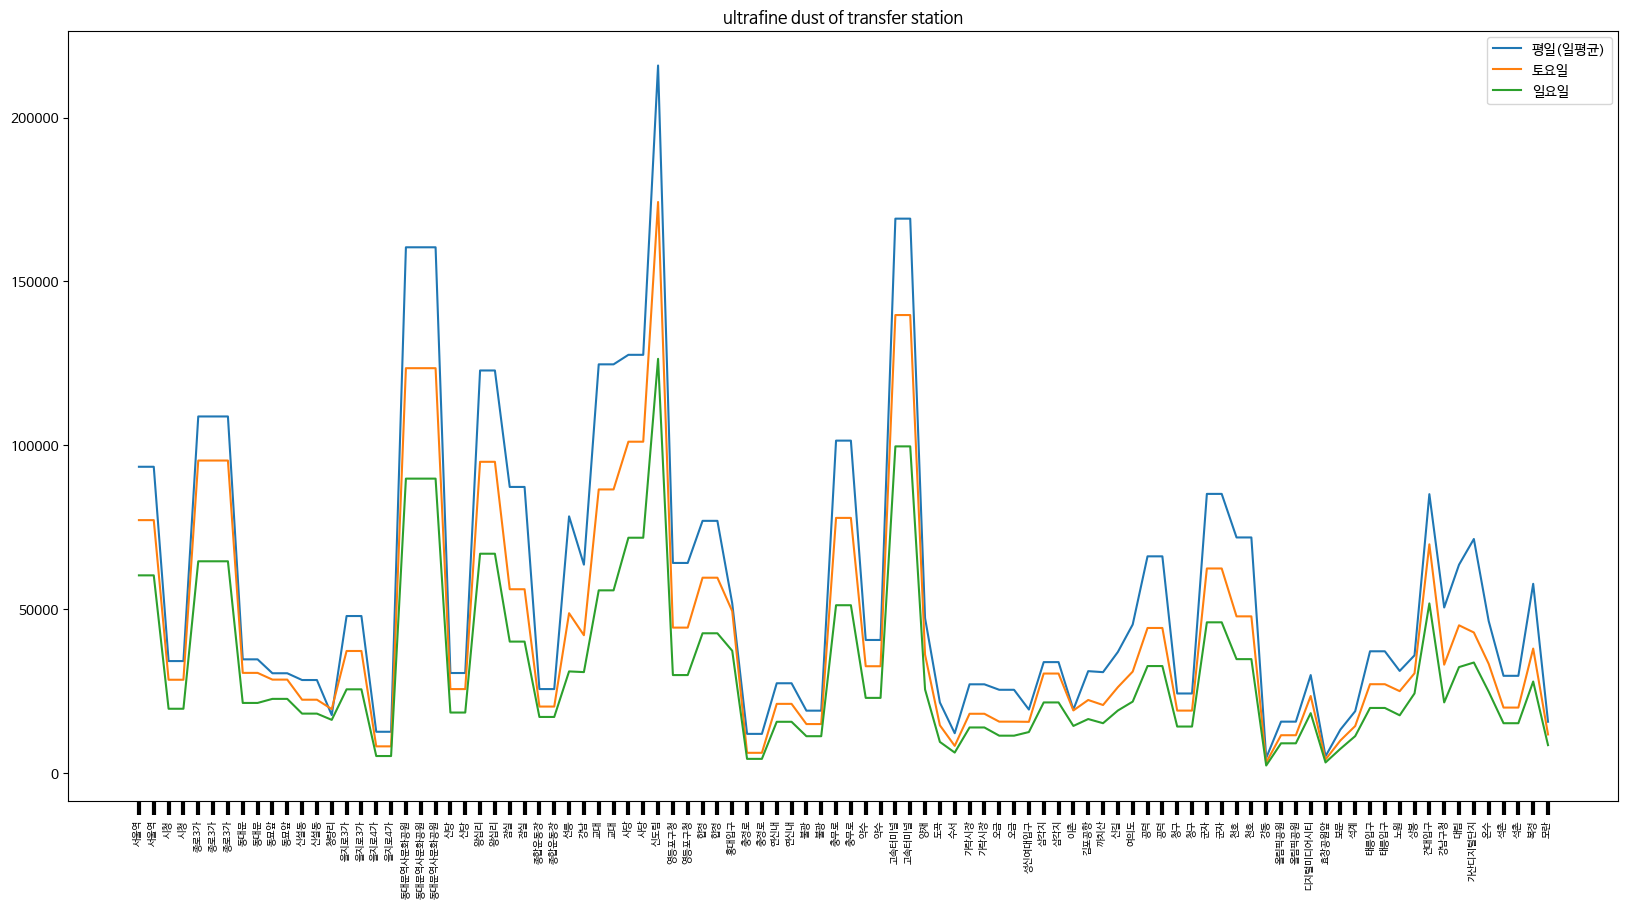

In [ ]:
#환승역 인원 그래프 그리기
# 전체 요일 
data = T.plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

#미세먼지 & 초미세먼지 시각화 데이터 

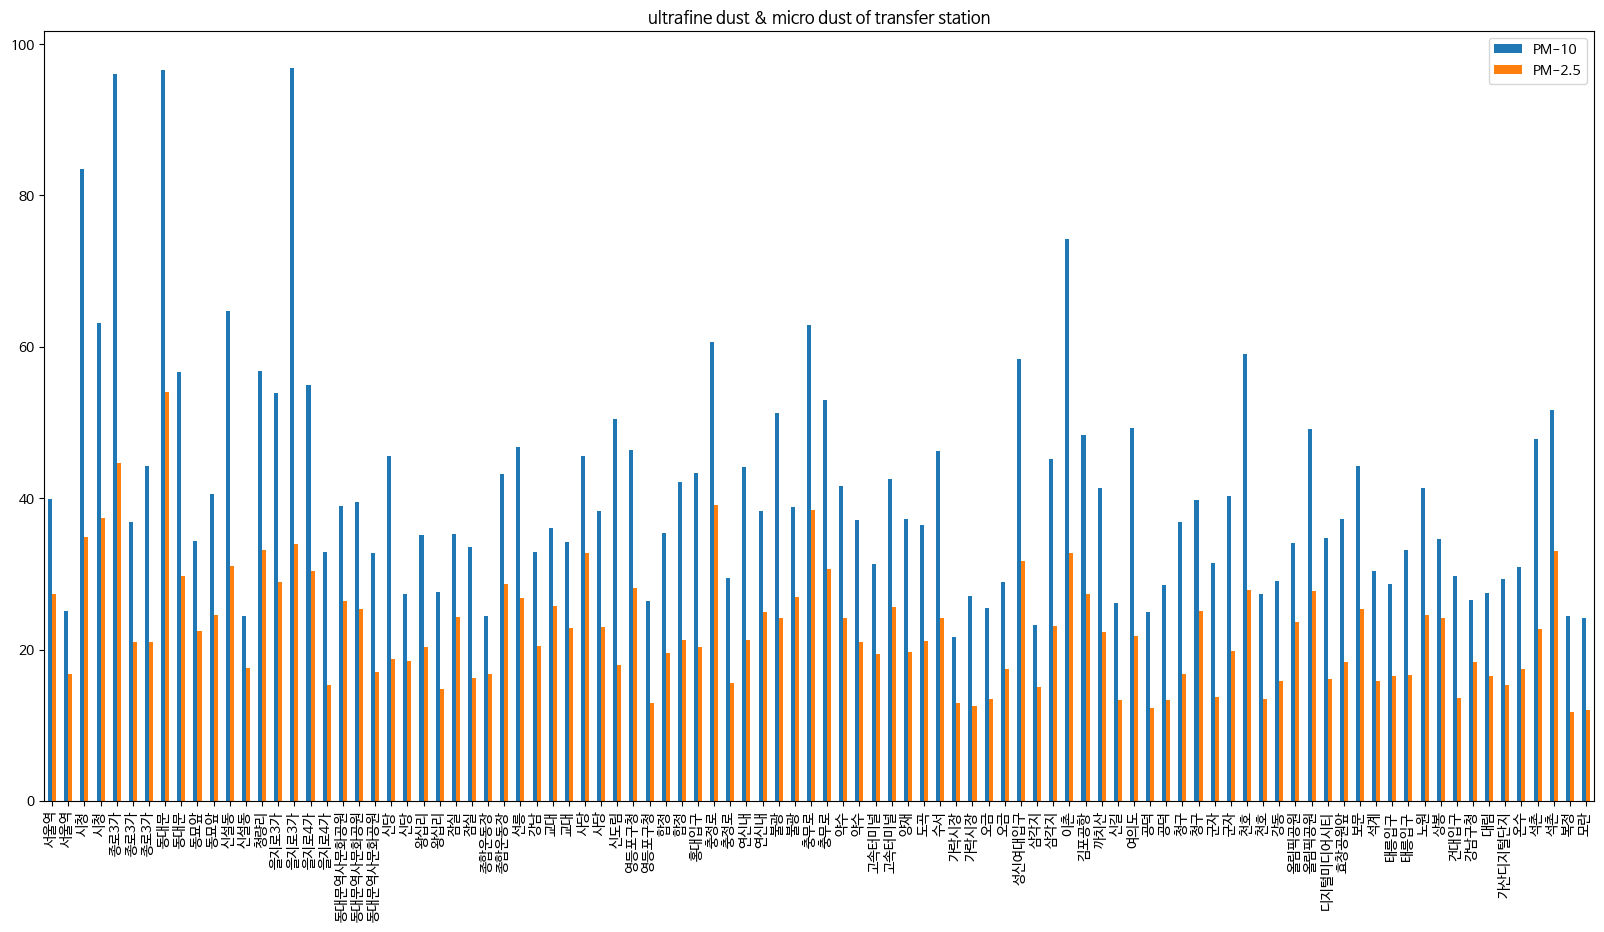

In [ ]:
#지하철 공기질 그래프 그리기
# 미세먼지 & 초미세먼지
PM.plot(kind = 'bar')      
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust & micro dust of transfer station') #그래프 제목
plt.show()

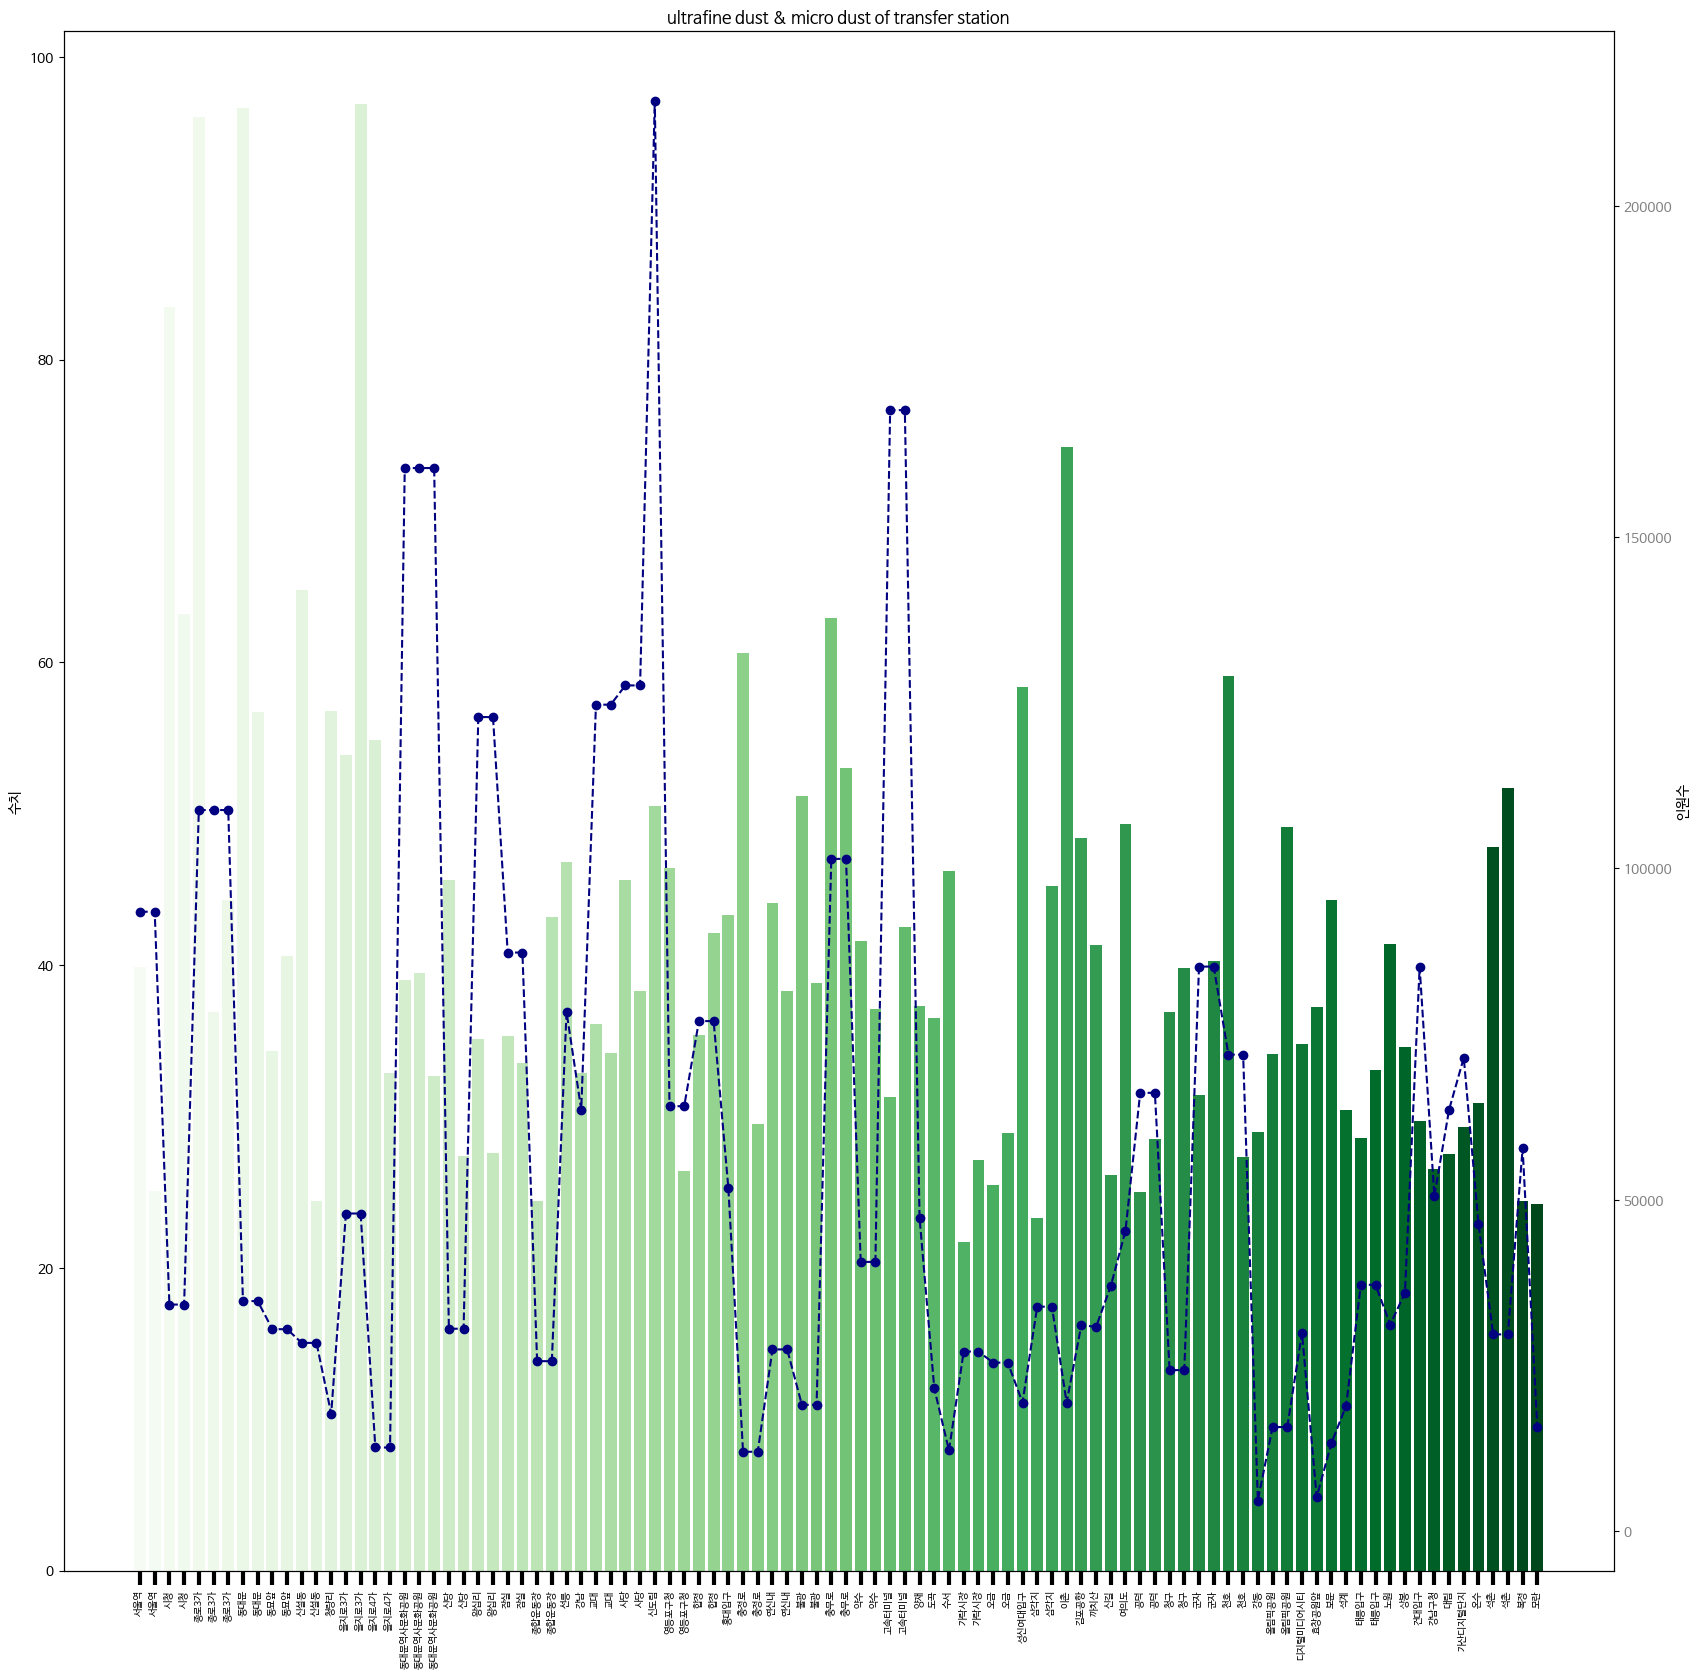

In [ ]:
#지하철 공기질 그래프 그리기
# 미세먼지 & 초미세먼지
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
fig = plt.figure(figsize=(20,20) )
ax1 = fig.add_subplot()
plt.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 

 
colors = sns.color_palette('Greens',len(PM))

xtick_label_position = list(range(len(PM))) # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) # x축 눈금 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
ax1.set_ylabel('수치',rotation=90)
plt.ticklabel_format(style='plain', axis='y',useOffset = False) # exponential 표기 변경
# plt.ylabel('수치',rotation=90)

ax1.bar(xtick_label_position, PM['PM-10'], color=colors)  # bar 표기 
 
color = 'navy'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, merge_data['평일(일평균)'], color=color, linestyle='--', marker='o') # line 그래프 
ax2.tick_params(axis='y', labelcolor='gray') # 눈금 label color
ax2.set_ylabel('인원수',rotation=90)
# plt.ylabel('인원수',rotation=270)



plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust & micro dust of transfer station') #그래프 제목
plt.show()